In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualizations
plt.style.use('ggplot')

# Display all columns in pandas
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/sametbaybatur/Downloads/Coffee_Shop_Sales.csv')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [5]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


In [6]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%Y')

In [8]:
df['Month'] = df['transaction_date'].dt.month
df['Weekday'] = df['transaction_date'].dt.weekday
df['Day'] = df['transaction_date'].dt.day
df['weekday_name'] = df['transaction_date'].dt.day_name()

<Axes: title={'center': 'Daily Revenue'}, xlabel='Day'>

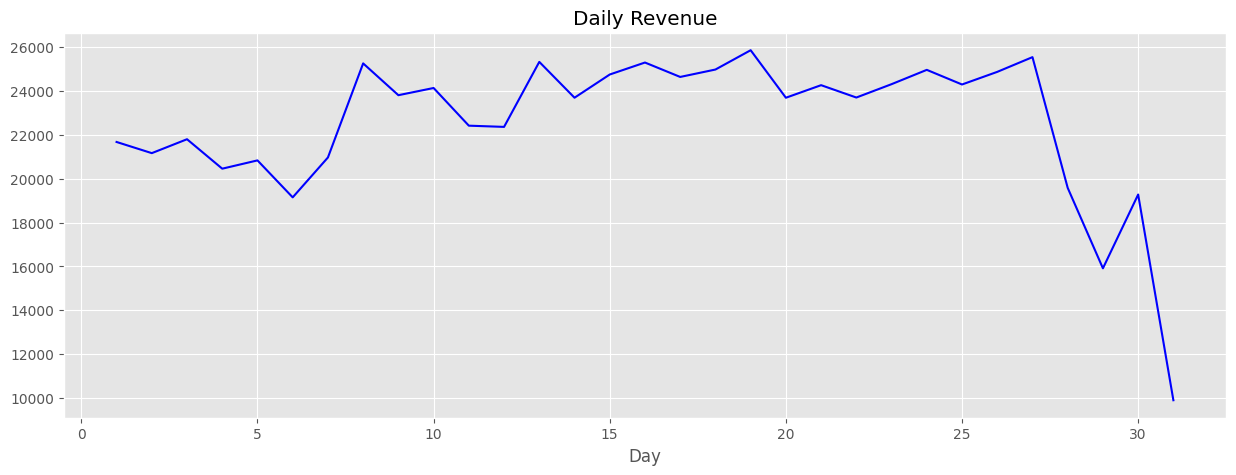

In [33]:
df.groupby('Day')['Revenue'].sum().plot(figsize=(15, 5), title='Daily Revenue', color='blue')

In [9]:
df['transaction_Hour'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

In [10]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Weekday,Day,weekday_name,transaction_Hour
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,6,1,Sunday,7
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,6,1,Sunday,7
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,6,1,Sunday,7
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,6,1,Sunday,7
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,6,1,Sunday,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,6,4,30,Friday,20
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6,4,30,Friday,20
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,6,4,30,Friday,20
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,6,4,30,Friday,20


In [29]:
df['Revenue'] = df['transaction_qty'] * df['unit_price']
df['Revenue'].sum()

np.float64(698812.3300000002)

<Axes: title={'center': 'Daily Revenue'}, xlabel='transaction_date'>

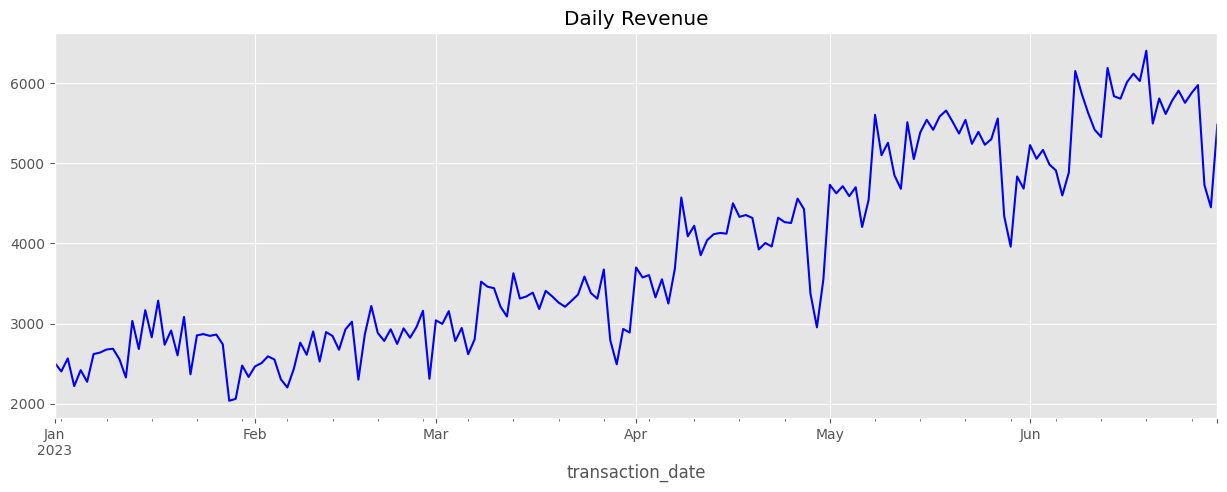

In [12]:
df.groupby('transaction_date')['Revenue'].sum().plot(figsize=(15, 5), title='Daily Revenue', color='blue')

<Axes: title={'center': 'Hourly Revenue'}, xlabel='transaction_Hour'>

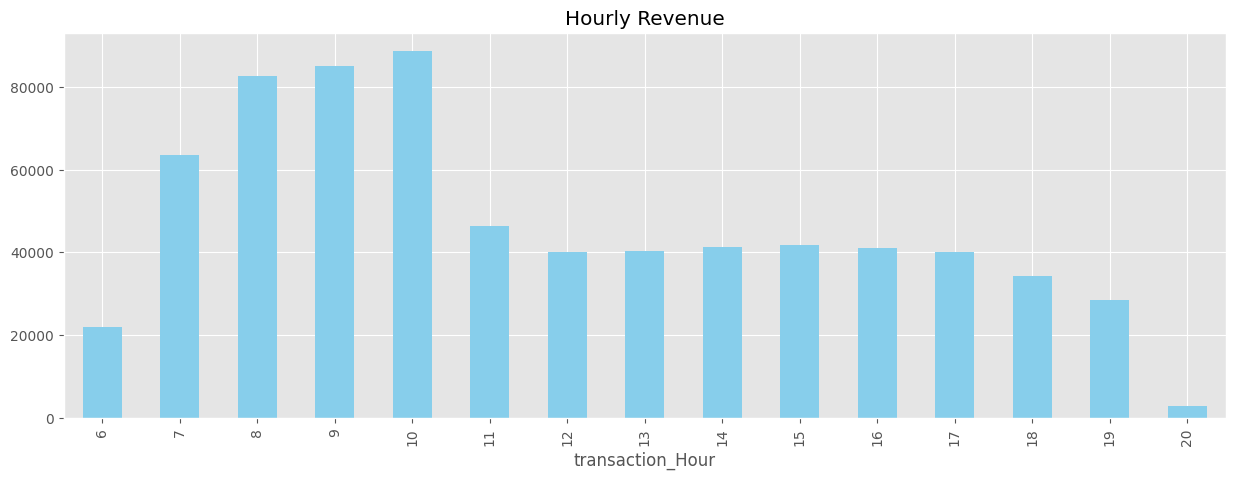

In [13]:
df.groupby('transaction_Hour')['Revenue'].sum().plot(figsize=(15, 5), kind='bar', title='Hourly Revenue', color='skyblue')

<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month'>

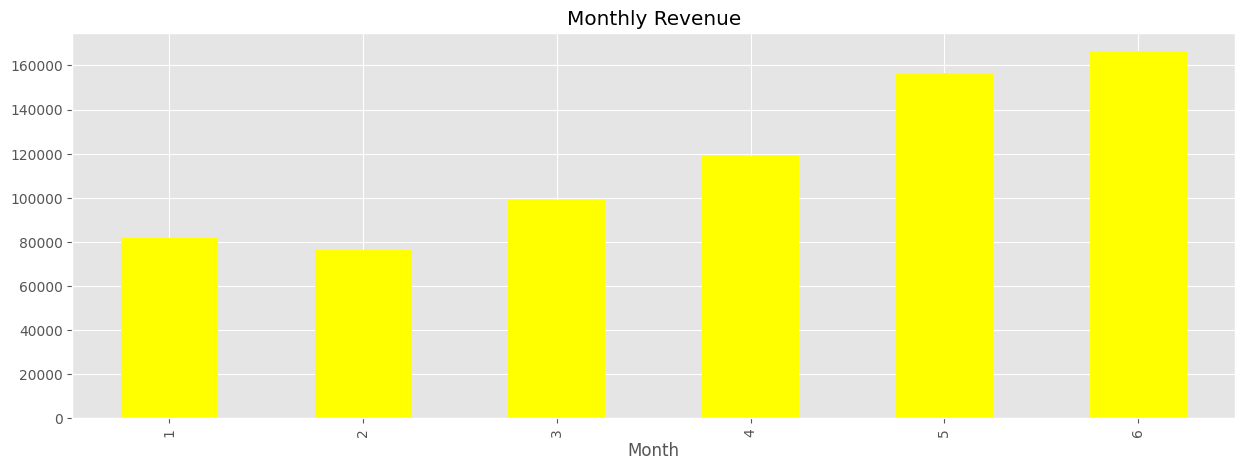

In [14]:
df.groupby('Month')['Revenue'].sum().plot(figsize=(15, 5), kind='bar',title='Monthly Revenue', color='yellow')

<Axes: title={'center': 'Day of the week Revenue'}, xlabel='Weekday'>

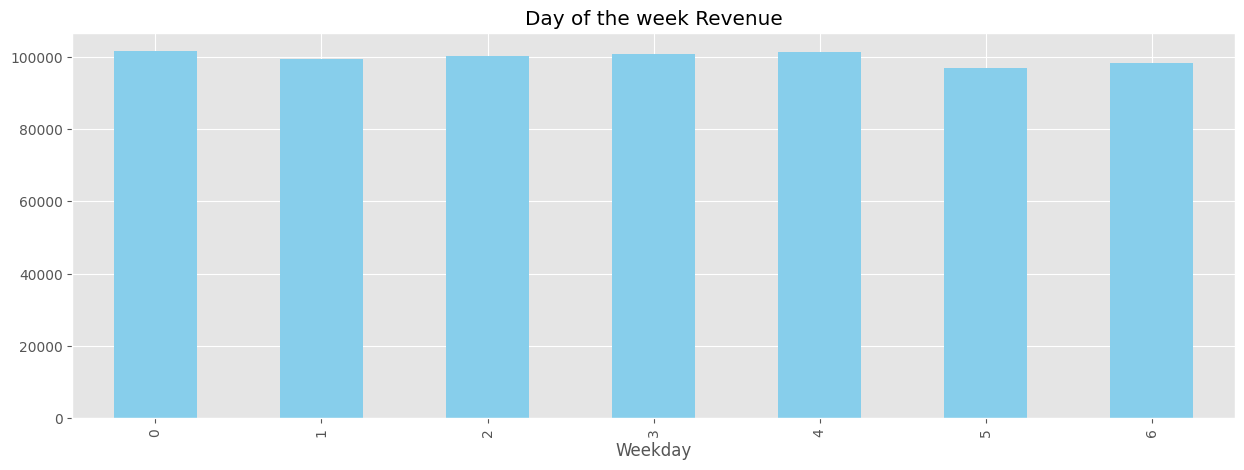

In [15]:
df.groupby('Weekday')['Revenue'].sum().plot(figsize=(15, 5), kind='bar', title='Day of the week Revenue', color='skyblue')

<Axes: title={'center': 'Store Location Revenue'}>

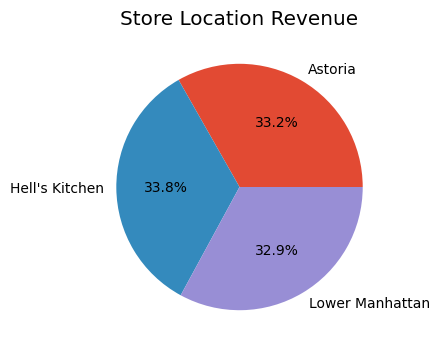

In [34]:
df.groupby('store_location')['Revenue'].sum().plot(
    figsize=(8, 4), 
    kind='pie', 
    title='Store Location Revenue', 
    color='skyblue', 
    autopct='%1.1f%%',
    ylabel=''  # Remove the y-label completely
)

<Axes: title={'center': 'Product Revenue'}, xlabel='product_detail'>

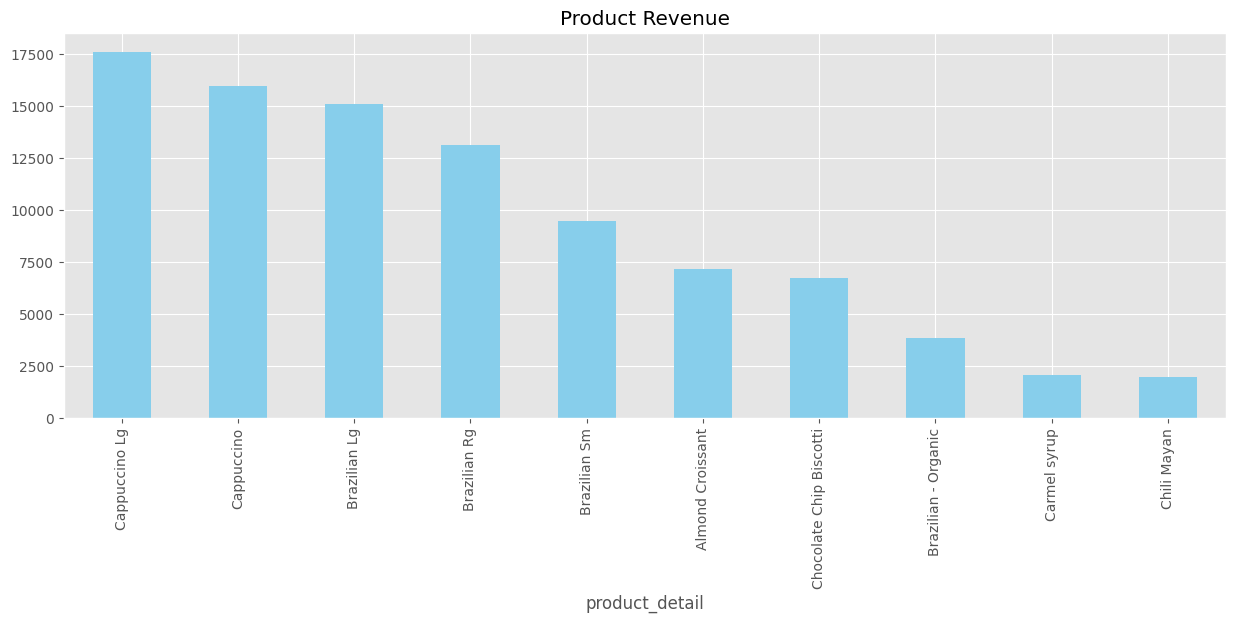

In [17]:
df.groupby('product_detail')['Revenue'].sum().head(10).sort_values(ascending=False).plot(figsize=(15, 5), kind='bar', title='Product Revenue', color='skyblue')

<Axes: title={'center': 'Product Category'}, xlabel='product_category'>

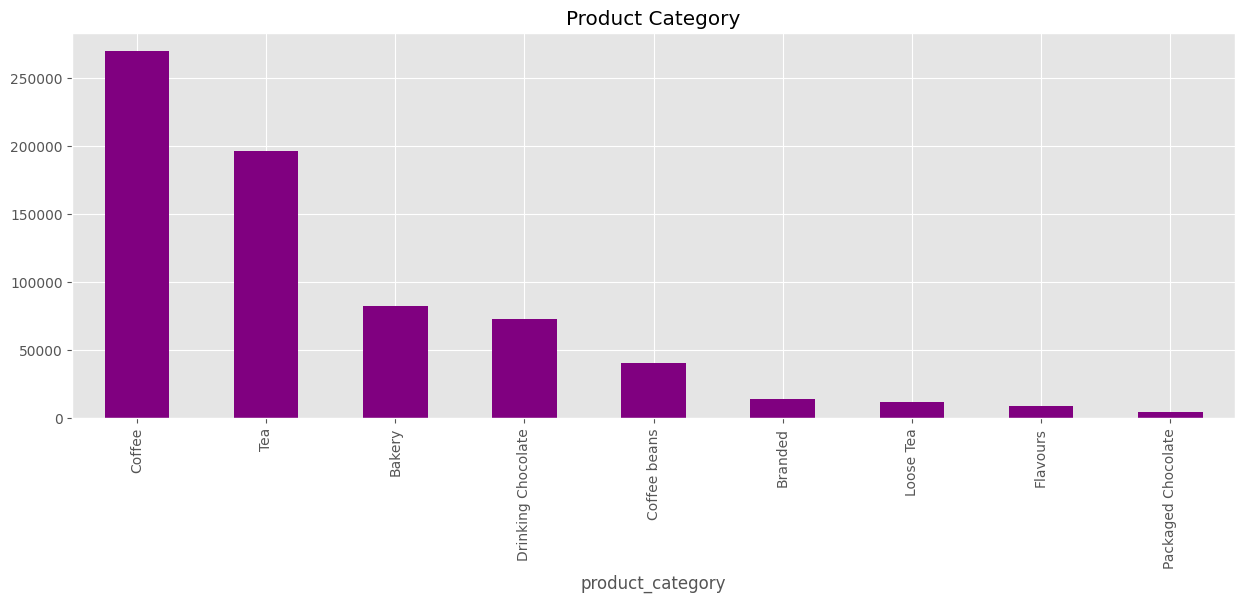

In [18]:
df.groupby('product_category')['Revenue'].sum().head(10).sort_values(ascending=False).plot(figsize=(15, 5), kind='bar', title='Product Category', color='purple')

<Axes: title={'center': 'Product Category Revenue Over Time'}, xlabel='transaction_date'>

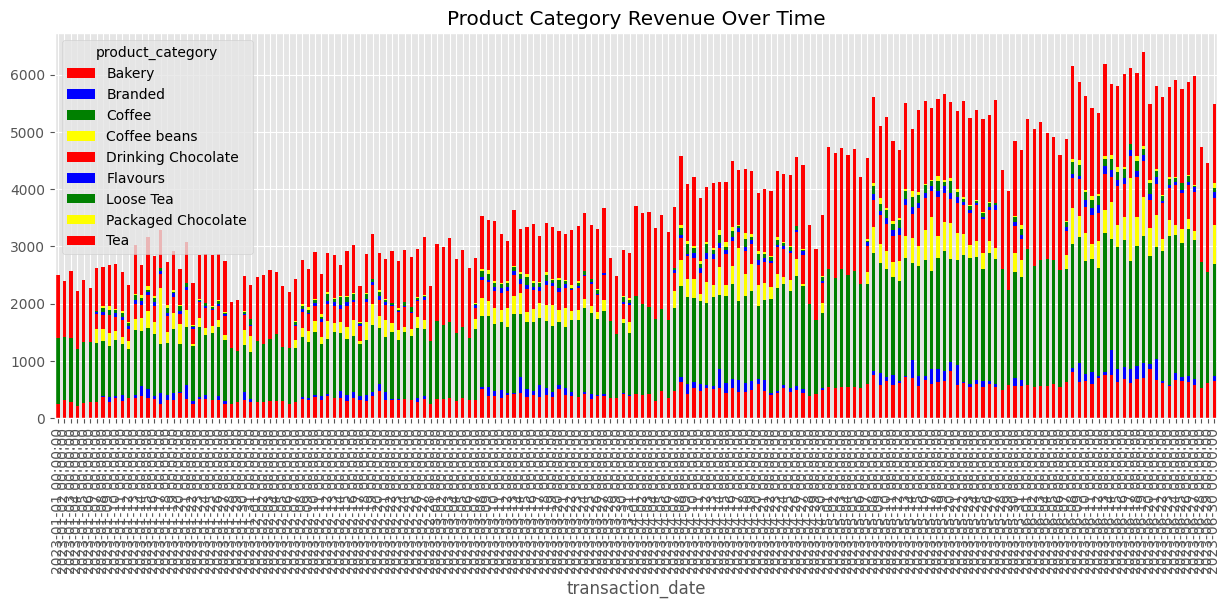

In [19]:
pivot_df = df.pivot_table(index='transaction_date', columns='product_category', values='Revenue', aggfunc='sum')
pivot_df.reset_index().plot(x='transaction_date', kind='bar', stacked=True, figsize=(15, 5), title='Product Category Revenue Over Time', color=['red', 'blue', 'green', 'yellow'])


In [20]:
monthly_revenue = df.pivot_table(index="Month", values="Revenue", aggfunc="sum")
print(monthly_revenue)


         Revenue
Month           
1       81677.74
2       76145.19
3       98834.68
4      118941.08
5      156727.76
6      166485.88


In [21]:
transactions_by_day = df["Weekday"].value_counts()
print(transactions_by_day)


Weekday
4    21701
3    21654
0    21643
2    21310
1    21202
6    21096
5    20510
Name: count, dtype: int64


In [22]:
category_transactions = df["product_category"].value_counts()
print(category_transactions)


product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64


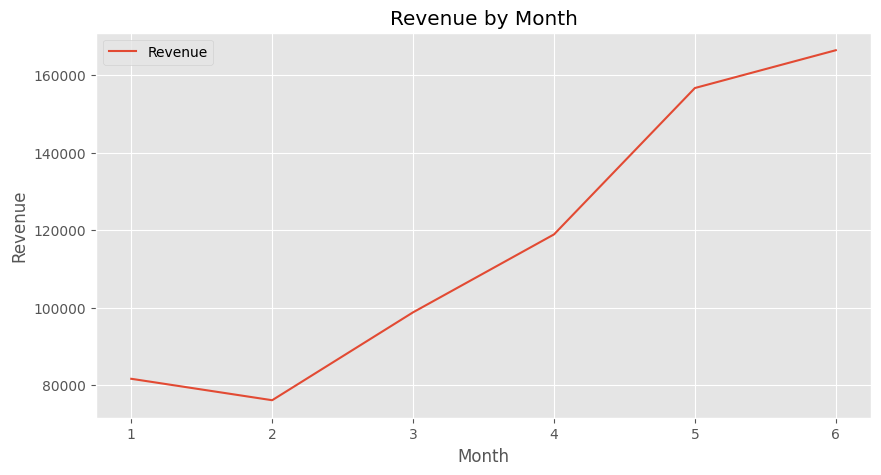

In [23]:
import matplotlib.pyplot as plt

monthly_revenue.sort_index().plot(kind="line", figsize=(10, 5), title="Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


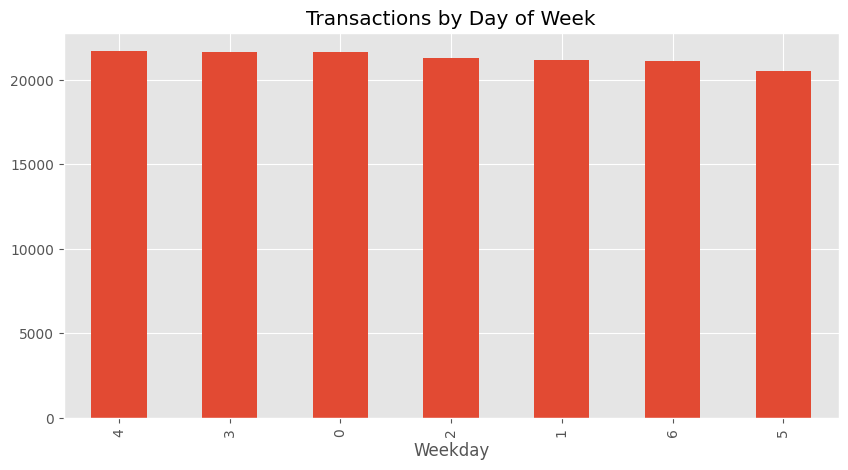

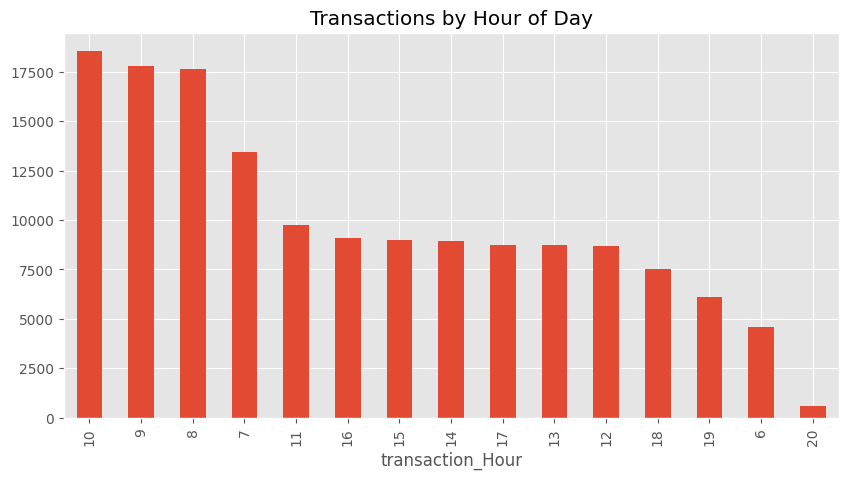

In [24]:
transactions_by_day.plot(kind="bar", figsize=(10, 5), title="Transactions by Day of Week")
plt.show()

transactions_by_hour = df["transaction_Hour"].value_counts()
transactions_by_hour.plot(kind="bar", figsize=(10, 5), title="Transactions by Hour of Day")
plt.show()


In [36]:
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Weekday,Day,weekday_name,transaction_Hour,Revenue
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,1,6,1,Sunday,7,6.00
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,6,1,Sunday,7,6.20
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,1,6,1,Sunday,7,9.00
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,6,1,Sunday,7,2.00
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,6,1,Sunday,7,6.20
5,6,2023-01-01,7:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone,1,6,1,Sunday,7,3.00
6,7,2023-01-01,7:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,1,6,1,Sunday,7,2.00
7,8,2023-01-01,7:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,1,6,1,Sunday,7,4.00
8,9,2023-01-01,7:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,1,6,1,Sunday,7,4.25
9,10,2023-01-01,7:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,1,6,1,Sunday,7,7.00


In [39]:
import re

# Extract size abbreviations (Lg, Sm, Rg, etc.) from product_detail
df['size'] = df['product_detail'].str.extract(r'(\bLg\b|\bSm\b|\bRg\b|\bMd\b)', flags=re.IGNORECASE)

# If you want full size names instead of abbreviations:
size_map = {'Lg': 'Large', 'Sm': 'Small', 'Rg': 'Regular', 'Md': 'Medium'}
df['size'] = df['size'].map(size_map)

# Now group by size
size_groups = df.groupby('size')['Revenue'].sum()
size_groups

size
Large      237958.15
Regular    199761.35
Small       46402.70
Name: Revenue, dtype: float64

In [ ]:
# Create size categories
df['size_category'] = 'Other'
df.loc[df['product_detail'].str.contains(r'\bLg\b', case=False), 'size_category'] = 'Large'
df.loc[df['product_detail'].str.contains(r'\bSm\b', case=False), 'size_category'] = 'Small'
df.loc[df['product_detail'].str.contains(r'\bRg\b', case=False), 'size_category'] = 'Regular'


# Now group by size_category
size_groups = df.groupby('size_category')['transaction_qty'].sum()

In [46]:
size_groups

size_category
Large      68540
Other      54321
Regular    70186
Small      21423
Name: transaction_qty, dtype: int64

In [69]:
# Extract size abbreviations (Lg, Sm, Rg, etc.) from product_detail
df['size'] = df['product_detail'].str.extract(r'(\bLg\b|\bSm\b|\bRg\b|\bMd\b)', flags=re.IGNORECASE)

# If you want full size names instead of abbreviations:
size_map = {'Lg': 'Large', 'Sm': 'Small', 'Rg': 'Regular', 'Md': 'Medium'}
df['size'] = df['size'].map(size_map)

# Now group by size
size_groups = df.groupby('size')['transaction_qty'].sum()

<Axes: title={'center': 'Revenue by Size'}>

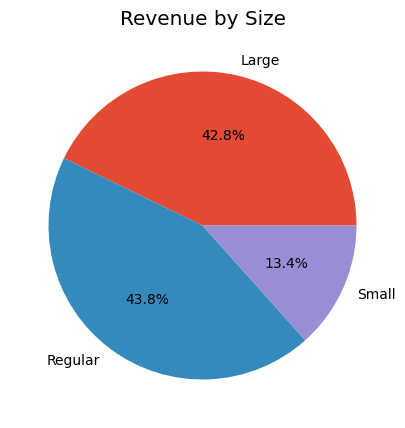

In [70]:
size_groups.plot(
    kind='pie', 
    figsize=(10, 5), 
    title='Revenue by Size',
    autopct='%1.1f%%',
    ylabel='')

In [58]:
df.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Month,Weekday,Day,weekday_name,transaction_Hour,Revenue,size,size_category
34040,34097,2023-03-01,14:53:06,2,5,Lower Manhattan,35,3.10,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,3,2,1,Wednesday,14,6.20,Regular,Regular
65153,65323,2023-04-13,9:17:06,2,8,Hell's Kitchen,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,4,3,13,Thursday,9,6.00,Regular,Regular
70249,70419,2023-04-19,7:18:38,1,5,Lower Manhattan,71,3.75,Bakery,Pastry,Chocolate Croissant,4,2,19,Wednesday,7,3.75,NaN,Other
83492,83666,2023-05-04,9:24:33,1,5,Lower Manhattan,35,3.10,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,5,3,4,Thursday,9,3.10,Regular,Regular
49850,49957,2023-03-24,9:49:18,1,5,Lower Manhattan,50,2.50,Tea,Brewed Black tea,Earl Grey Rg,3,4,24,Friday,9,2.50,Regular,Regular
113145,113407,2023-05-31,9:37:10,1,3,Astoria,54,2.50,Tea,Brewed Chai tea,Morning Sunrise Chai Rg,5,2,31,Wednesday,9,2.50,Regular,Regular
9306,9336,2023-01-17,9:04:41,1,8,Hell's Kitchen,31,2.20,Coffee,Gourmet brewed coffee,Ethiopia Sm,1,1,17,Tuesday,9,2.20,Small,Small
101805,102059,2023-05-20,12:37:46,1,5,Lower Manhattan,83,14.00,Branded,Housewares,I Need My Bean! Latte cup,5,5,20,Saturday,12,14.00,NaN,Other
130896,131233,2023-06-15,11:16:36,1,8,Hell's Kitchen,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg,6,3,15,Thursday,11,3.50,Regular,Regular
120510,120847,2023-06-07,7:17:13,2,5,Lower Manhattan,31,2.20,Coffee,Gourmet brewed coffee,Ethiopia Sm,6,2,7,Wednesday,7,4.40,Small,Small


<Axes: xlabel='weekday_name'>

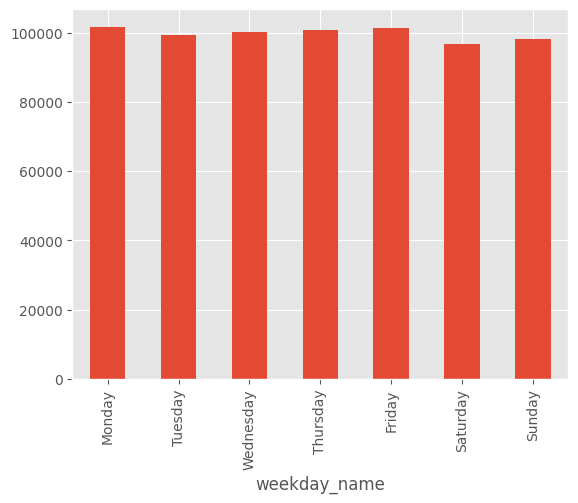

In [62]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby('weekday_name')['Revenue'].sum().loc[weekday_order].plot(kind='bar')

<Axes: title={'center': 'Average Transaction Value per Store'}>

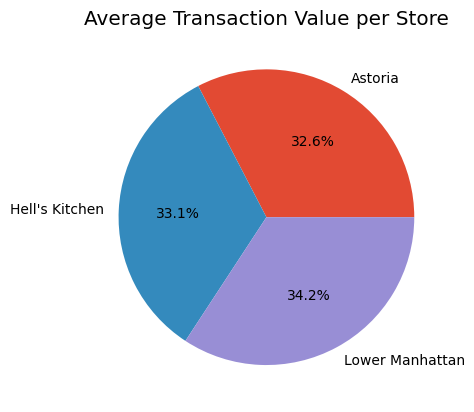

In [67]:
df.groupby('store_location')['Revenue'].mean().plot(
    kind='pie', 
    title='Average Transaction Value per Store',
    autopct='%1.1f%%',
    ylabel='',)

<Axes: title={'center': 'Popular Sizes (Large/Small/Regular)'}, xlabel='size_category'>

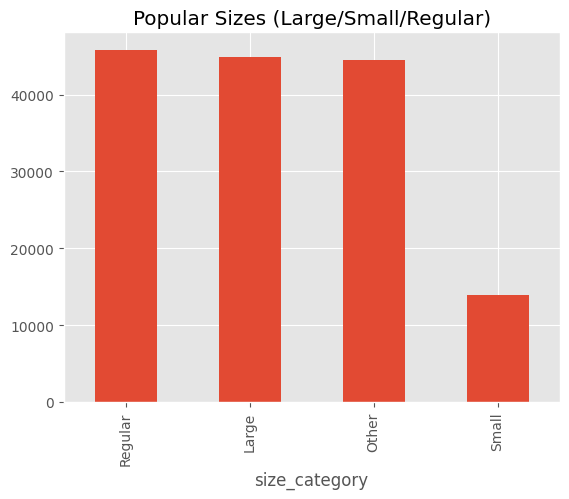

In [68]:
df['size_category'].value_counts().plot(
    kind='bar', title='Popular Sizes (Large/Small/Regular)')

<Axes: title={'center': 'Top 5 Product Types by Revenue'}, ylabel='product_type'>

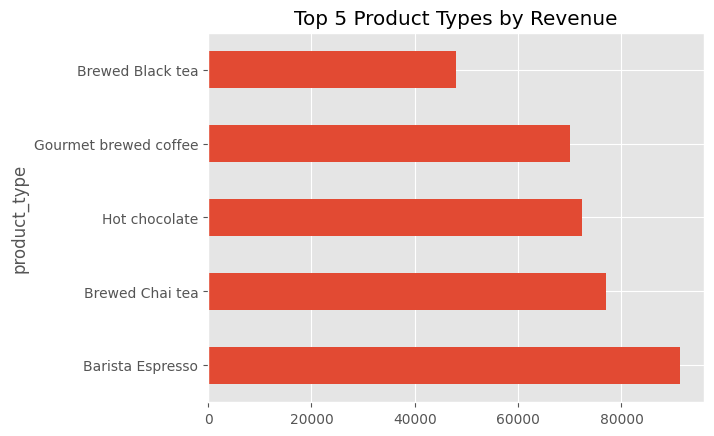

In [71]:
df.groupby('product_type')['Revenue'].sum().nlargest(5).plot(
    kind='barh', title='Top 5 Product Types by Revenue')

<Axes: title={'center': 'Quantity Sold vs. Price'}, xlabel='unit_price', ylabel='transaction_qty'>

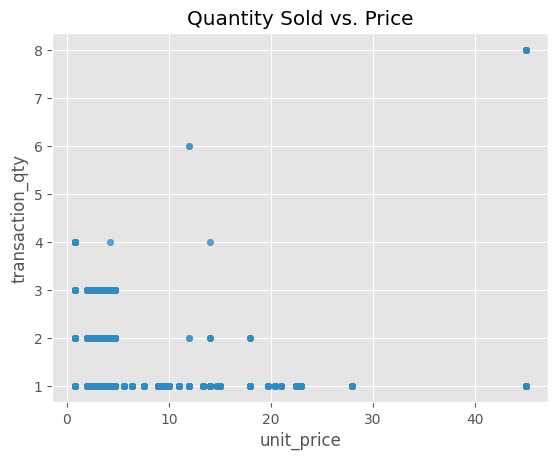

In [72]:
df.plot.scatter(x='unit_price', y='transaction_qty', alpha=0.5, 
                title='Quantity Sold vs. Price')

<Axes: title={'center': 'Size Distribution by Category'}, xlabel='product_category'>

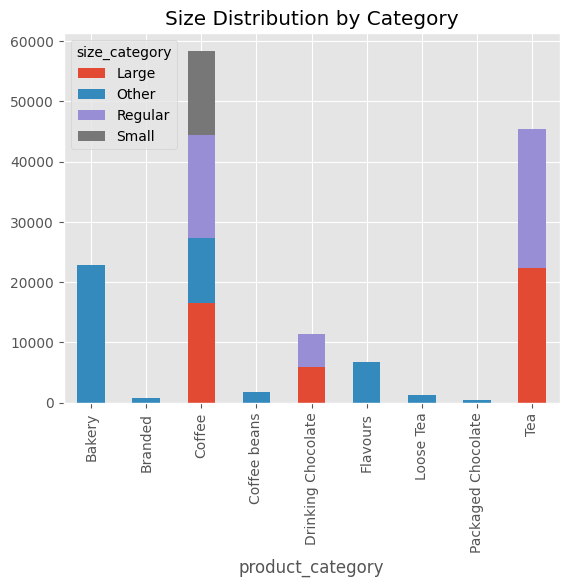

In [73]:
pd.crosstab(df['product_category'], df['size_category']).plot(
    kind='bar', stacked=True, title='Size Distribution by Category')

In [74]:
high_value = df[df['Revenue'] > df['Revenue'].quantile(0.95)]
high_value['product_detail'].value_counts().head(5)

product_detail
Sustainably Grown Organic Lg    1442
I Need My Bean! Latte cup        304
I Need My Bean! Diner mug        222
I Need My Bean! T-shirt          221
Ethiopia                         218
Name: count, dtype: int64

In [76]:
df['unit_price'].head(10)

0    3.00
1    3.10
2    4.50
3    2.00
4    3.10
5    3.00
6    2.00
7    2.00
8    4.25
9    3.50
Name: unit_price, dtype: float64

In [77]:
top10_expensive = df.sort_values('unit_price', ascending=False).head(10)[['product_detail', 'unit_price']]
print(top10_expensive)

       product_detail  unit_price
87829       Civet Cat        45.0
65393       Civet Cat        45.0
54634       Civet Cat        45.0
88226       Civet Cat        45.0
112132      Civet Cat        45.0
112109      Civet Cat        45.0
102328      Civet Cat        45.0
66261       Civet Cat        45.0
66083       Civet Cat        45.0
96702       Civet Cat        45.0


In [78]:
top10_avg_price = df.groupby('product_detail')['unit_price'].mean().nlargest(10).reset_index()
print(top10_avg_price)

             product_detail  unit_price
0                 Civet Cat   45.000000
1   I Need My Bean! T-shirt   27.886878
2       Organic Decaf Blend   22.609223
3                  Ethiopia   21.000000
4      Primo Espresso Roast   20.450000
5     Jamacian Coffee River   19.750000
6       Brazilian - Organic   18.000000
7  Our Old Time Diner Blend   18.000000
8    Columbian Medium Roast   15.000000
9            Espresso Roast   14.750000


<Axes: title={'center': 'Top 10 Unique Product Prices'}, ylabel='product_detail'>

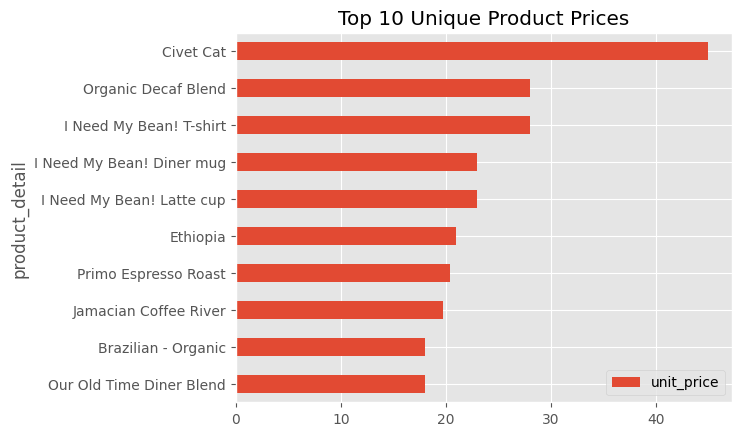

In [88]:
top10_unique = df.groupby('product_detail')['unit_price'].max() \
                .sort_values(ascending=False).head(10).reset_index().sort_values('unit_price', ascending=True)

top10_unique.plot(x='product_detail', y='unit_price', kind='barh', title='Top 10 Unique Product Prices')

In [89]:
# Get price distribution stats first
price_stats = df.groupby('product_detail')['unit_price'].agg(['max', 'count'])
print(price_stats.sort_values('max', ascending=False).head(20))

                                max  count
product_detail                            
Civet Cat                     45.00    190
I Need My Bean! T-shirt       28.00    221
Organic Decaf Blend           28.00    206
I Need My Bean! Latte cup     23.00    304
I Need My Bean! Diner mug     23.00    222
Ethiopia                      21.00    218
Primo Espresso Roast          20.45    150
Jamacian Coffee River         19.75    146
Our Old Time Diner Blend      18.00    183
Brazilian - Organic           18.00    209
Columbian Medium Roast        15.00    148
Espresso Roast                14.75    169
Chili Mayan                   13.33    148
Spicy Eye Opener Chai         10.95    122
Guatemalan Sustainably Grown  10.00    134
Morning Sunrise Chai           9.50    168
Serenity Green Tea             9.25    159
Earl Grey                      8.95    142
Traditional Blend Chai         8.95    153
Peppermint                     8.95    153


In [94]:
# Products with high price AND at least 5 sales
valid_expensive = df.groupby('product_detail').filter(lambda x: x['unit_price'].count() >= 200)
top10_valid = valid_expensive.groupby('product_detail')['unit_price'].max() \
                           .sort_values(ascending=False).head(10)
print(top10_valid)

product_detail
Organic Decaf Blend             28.00
I Need My Bean! T-shirt         28.00
I Need My Bean! Diner mug       23.00
I Need My Bean! Latte cup       23.00
Ethiopia                        21.00
Brazilian - Organic             18.00
Sustainably Grown Organic        7.60
Scottish Cream Scone             5.63
Sustainably Grown Organic Lg     4.75
Jumbo Savory Scone               4.69
Name: unit_price, dtype: float64
